In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:

# Load the dataset
file_path = "/content/FY_2025_Hospital_Readmissions_Reduction_Program_Hospital.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Overview:")
print(df.info())


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18510 entries, 0 to 18509
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               18510 non-null  object 
 1   Facility ID                 18510 non-null  int64  
 2   State                       18510 non-null  object 
 3   Measure Name                18510 non-null  object 
 4   Number of Discharges        8340 non-null   float64
 5   Footnote                    6583 non-null   float64
 6   Excess Readmission Ratio    11927 non-null  float64
 7   Predicted Readmission Rate  11927 non-null  float64
 8   Expected Readmission Rate   11927 non-null  float64
 9   Number of Readmissions      11927 non-null  object 
 10  Start Date                  18510 non-null  object 
 11  End Date                    18510 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.7+ MB
None
        

In [4]:
df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-AMI-HRRP,296.0,NaN,0.9483,13.0146,13.7235,36,07/01/2020,06/30/2023
1,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-CABG-HRRP,151.0,NaN,0.9509,9.6899,10.1898,13,07/01/2020,06/30/2023
2,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HF-HRRP,681.0,NaN,1.0597,21.5645,20.3495,151,07/01/2020,06/30/2023
3,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9654,4.2680,4.4211,Too Few to Report,07/01/2020,06/30/2023
4,SOUTHEAST HEALTH MEDICAL CENTER,10001,AL,READM-30-PN-HRRP,490.0,NaN,0.9715,16.1137,16.5863,77,07/01/2020,06/30/2023


In [5]:
# Filtering Hartford Hospital Data
hartford_hospital_df = df[df["Facility Name"].str.contains("HARTFORD HOSPITAL", case=False, na=False)]

hartford_hospital_df.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
3264,HARTFORD HOSPITAL,70025,CT,READM-30-AMI-HRRP,665.0,NaN,1.0223,13.9759,13.6703,94,07/01/2020,06/30/2023
3265,HARTFORD HOSPITAL,70025,CT,READM-30-PN-HRRP,582.0,NaN,1.0468,16.4774,15.7407,99,07/01/2020,06/30/2023
3266,HARTFORD HOSPITAL,70025,CT,READM-30-HIP-KNEE-HRRP,579.0,NaN,0.9776,4.7130,4.8208,27,07/01/2020,06/30/2023
3267,HARTFORD HOSPITAL,70025,CT,READM-30-HF-HRRP,1315.0,NaN,1.1611,23.0580,19.8594,314,07/01/2020,06/30/2023
3268,HARTFORD HOSPITAL,70025,CT,READM-30-COPD-HRRP,164.0,NaN,0.9567,16.8863,17.6504,25,07/01/2020,06/30/2023


In [6]:
# Selecting relevant columns
hartford_factors = hartford_hospital_df[["Measure Name", "Number of Discharges", "Excess Readmission Ratio",
                                         "Predicted Readmission Rate", "Expected Readmission Rate"]]

hartford_factors.head()

,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
3264,READM-30-AMI-HRRP,665.0,1.0223,13.9759,13.6703
3265,READM-30-PN-HRRP,582.0,1.0468,16.4774,15.7407
3266,READM-30-HIP-KNEE-HRRP,579.0,0.9776,4.7130,4.8208
3267,READM-30-HF-HRRP,1315.0,1.1611,23.0580,19.8594
3268,READM-30-COPD-HRRP,164.0,0.9567,16.8863,17.6504


In [7]:
# Sorting by highest excess readmission ratio
hartford_factors_sorted = hartford_factors.sort_values(by="Excess Readmission Ratio", ascending=False)
hartford_factors_sorted.head()

,Measure Name,Number of Discharges,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
3267,READM-30-HF-HRRP,1315.0,1.1611,23.0580,19.8594
3265,READM-30-PN-HRRP,582.0,1.0468,16.4774,15.7407
3264,READM-30-AMI-HRRP,665.0,1.0223,13.9759,13.6703
3266,READM-30-HIP-KNEE-HRRP,579.0,0.9776,4.7130,4.8208
3269,READM-30-CABG-HRRP,249.0,0.9757,11.5757,11.8639


In [8]:
# Filtering Connecticut hospitals
ct_hospitals = df[df["State"] == "CT"]
ct_hospitals.head()

,Facility Name,Facility ID,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
3162,ST FRANCIS HOSPITAL & MEDICAL CENTER,70002,CT,READM-30-PN-HRRP,351.0,NaN,1.0736,17.4264,16.2324,66,07/01/2020,06/30/2023
3163,ST FRANCIS HOSPITAL & MEDICAL CENTER,70002,CT,READM-30-HIP-KNEE-HRRP,NaN,NaN,0.9270,5.8409,6.3011,Too Few to Report,07/01/2020,06/30/2023
3164,ST FRANCIS HOSPITAL & MEDICAL CENTER,70002,CT,READM-30-HF-HRRP,987.0,NaN,0.8969,17.8906,19.9462,169,07/01/2020,06/30/2023
3165,ST FRANCIS HOSPITAL & MEDICAL CENTER,70002,CT,READM-30-COPD-HRRP,162.0,NaN,0.9304,18.1683,19.5267,25,07/01/2020,06/30/2023
3166,ST FRANCIS HOSPITAL & MEDICAL CENTER,70002,CT,READM-30-CABG-HRRP,119.0,NaN,1.0322,12.5500,12.1587,16,07/01/2020,06/30/2023


In [10]:
# Summarizing the excess readmission ratio across all hospitals in CT
ct_summary = ct_hospitals.groupby("Facility Name")[["Excess Readmission Ratio", "Predicted Readmission Rate", "Expected Readmission Rate"]].mean()
ct_summary.head()

,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
Facility Name,,,
BRIDGEPORT HOSPITAL,1.004650,13.952450,13.830050
BRISTOL HOSPITAL,1.032833,18.053233,17.494500
CHARLOTTE HUNGERFORD HOSPITAL,1.115433,20.718433,18.645967
DANBURY HOSPITAL,0.995167,13.625567,13.425917
DAY KIMBALL HOSPITAL,1.051875,14.547200,13.363925


In [12]:
# Sorting hospitals by Excess Readmission Ratio
ct_summary = ct_summary.sort_values(by="Excess Readmission Ratio", ascending=False)
ct_summary.head()

,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate
Facility Name,,,
CHARLOTTE HUNGERFORD HOSPITAL,1.115433,20.718433,18.645967
DAY KIMBALL HOSPITAL,1.051875,14.547200,13.363925
MIDDLESEX HOSPITAL,1.039580,14.573880,13.942880
MIDSTATE MEDICAL CENTER,1.038700,15.524120,15.215780
BRISTOL HOSPITAL,1.032833,18.053233,17.494500


<ipython-input-13-4809829f30df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hartford_factors_sorted["Measure Name"], y=hartford_factors_sorted["Excess Readmission Ratio"], palette="viridis")


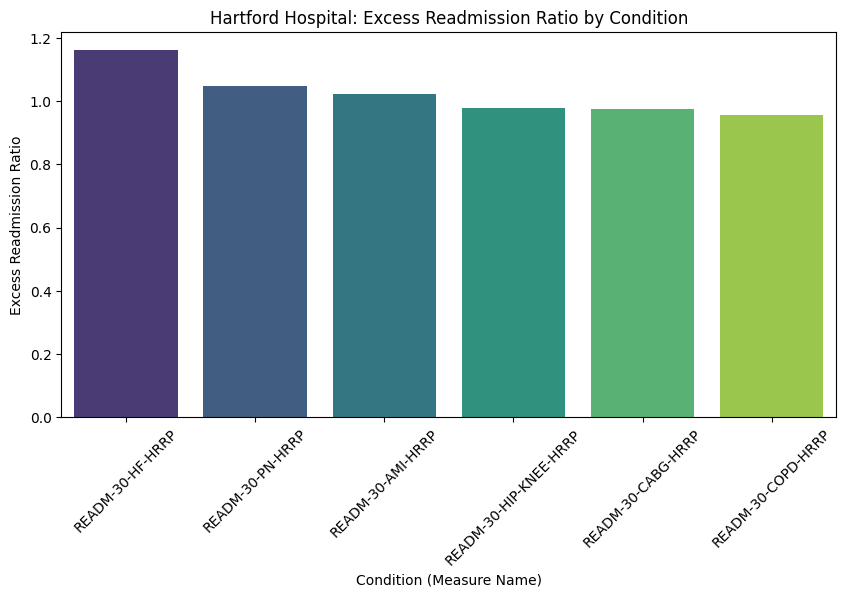

In [13]:
# Bar Chart: Readmission Rates by Condition
plt.figure(figsize=(10, 5))
sns.barplot(x=hartford_factors_sorted["Measure Name"], y=hartford_factors_sorted["Excess Readmission Ratio"], palette="viridis")
plt.xlabel("Condition (Measure Name)")
plt.ylabel("Excess Readmission Ratio")
plt.title("Hartford Hospital: Excess Readmission Ratio by Condition")
plt.xticks(rotation=45)
plt.show()

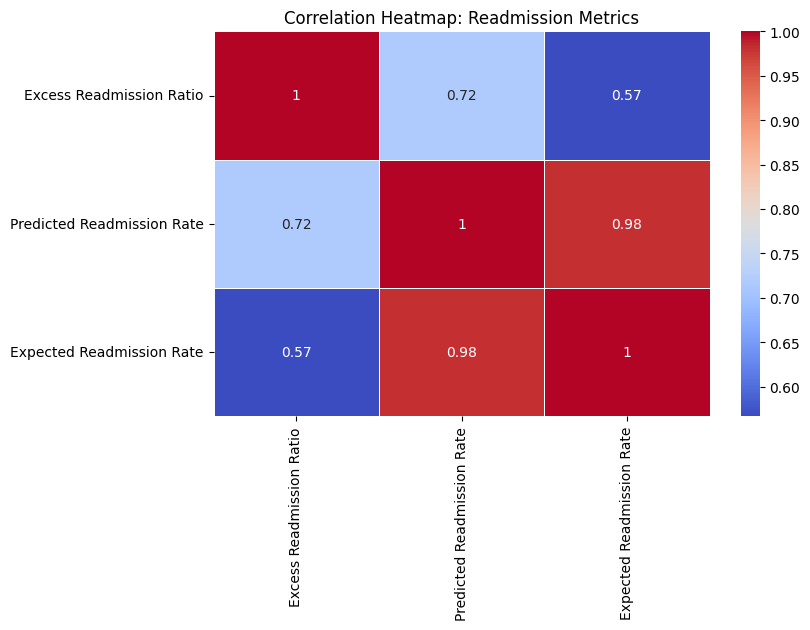

In [14]:
# Heatmap: Correlation Analysis
plt.figure(figsize=(8, 5))
sns.heatmap(hartford_factors_sorted[["Excess Readmission Ratio", "Predicted Readmission Rate", "Expected Readmission Rate"]].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Readmission Metrics")
plt.show()

In [15]:
# Estimating Financial Penalties for Hartford HealthCare
estimated_medicare_revenue = 500_000_000  # Example: $500 million per hospital
hartford_excess_ratio = hartford_factors_sorted["Excess Readmission Ratio"].max()
if hartford_excess_ratio > 1:
    penalty_percentage = min(0.03, (hartford_excess_ratio - 1) * 0.03)
    estimated_penalty = penalty_percentage * estimated_medicare_revenue
else:
    estimated_penalty = 0

print(f"Estimated Medicare Penalty for Hartford HealthCare: ${estimated_penalty:,.2f}")


Estimated Medicare Penalty for Hartford HealthCare: $2,416,500.00


In [16]:
# Trend Analysis Over Time
df["Start Date"] = pd.to_datetime(df["Start Date"])
df["End Date"] = pd.to_datetime(df["End Date"])

hartford_trend_analysis = df.groupby(["Facility Name", "Start Date"])[["Excess Readmission Ratio", "Predicted Readmission Rate", "Expected Readmission Rate"]].mean()
print("Hartford HealthCare Readmission Trends Over Time:")
print(hartford_trend_analysis.loc["HARTFORD HOSPITAL"].dropna())


Hartford HealthCare Readmission Trends Over Time:
            Excess Readmission Ratio  Predicted Readmission Rate  \
Start Date                                                         
2020-07-01                  1.023367                   14.447717   

            Expected Readmission Rate  
Start Date                             
2020-07-01                   13.93425  
